In [470]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

In [471]:
#importing datasets from csv form
dataset = pd.read_csv("D:\DCS\Projects\Sem 4 PA Project-\Bitcoin.csv",parse_dates=True, index_col="Date", dayfirst=True)

In [472]:
print("Dimension of dataset:", dataset.shape)
print(dataset.info())

Dimension of dataset: (1461, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2018-01-01 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1461 non-null   float64
 1   High       1461 non-null   float64
 2   Low        1461 non-null   float64
 3   Close      1461 non-null   float64
 4   Adj Close  1461 non-null   float64
 5   Volume     1461 non-null   float64
dtypes: float64(6)
memory usage: 79.9 KB
None


In [473]:
#sample dataset
print("Sample Dataset")
print(dataset.head())

Sample Dataset
                  Open         High          Low        Close    Adj Close  \
Date                                                                         
2018-01-01  14112.2002  14112.20020  13154.70020  13657.20020  13657.20020   
2018-01-02  13625.0000  15444.59961  13163.59961  14982.09961  14982.09961   
2018-01-03  14978.2002  15572.79981  14844.50000  15201.00000  15201.00000   
2018-01-04  15270.7002  15739.70020  14522.20020  15599.20020  15599.20020   
2018-01-05  15477.2002  17705.19922  15202.79981  17429.50000  17429.50000   

                  Volume  
Date                      
2018-01-01  1.029120e+10  
2018-01-02  1.684660e+10  
2018-01-03  1.687190e+10  
2018-01-04  2.178320e+10  
2018-01-05  2.384090e+10  


In [474]:
#summary
print("Summary")
print(dataset.describe())

Summary
               Open          High           Low         Close     Adj Close  \
count   1461.000000   1461.000000   1461.000000   1461.000000   1461.000000   
mean   18356.285344  18846.145478  17812.714579  18375.242011  18375.242011   
std    17751.530175  18246.609870  17184.148064  17760.299776  17760.299776   
min     3236.274658   3275.377930   3191.303467   3236.761719   3236.761719   
25%     7116.552734   7276.660156   6898.282227   7116.804199   7116.804199   
50%     9471.213867   9652.737305   9263.069336   9475.277344   9475.277344   
75%    28841.574220  29244.876950  28201.992190  29001.720700  29001.720700   
max    67549.734380  68789.625000  66382.062500  67566.828130  67566.828130   

             Volume  
count  1.461000e+03  
mean   2.574749e+10  
std    2.116309e+10  
min    2.923670e+09  
25%    8.041160e+09  
50%    2.225681e+10  
75%    3.621693e+10  
max    3.510000e+11  


In [475]:
#null value checking
missing_values=dataset.isnull().sum()
print("Checking for missing values")
print(missing_values)

# Drop any missing values if present
dataset.dropna(inplace=True)

Checking for missing values
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [476]:
# Feature Selection
df=['Open','High','Low','Close','Adj Close','Volume']
data=dataset[df]

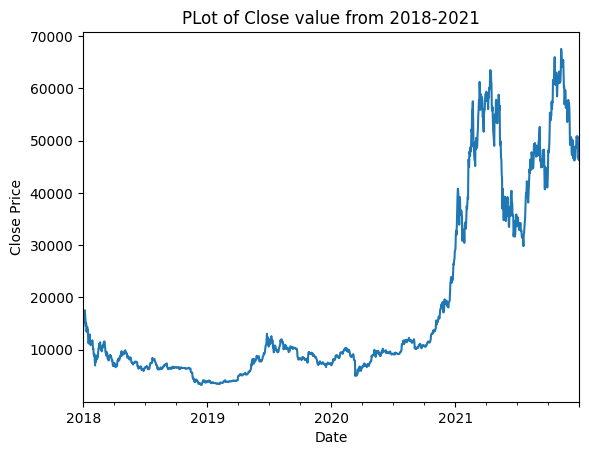

In [477]:
#plotting graph for a single column 
dataset['Close'].plot()
plt.title('PLot of Close value from 2018-2021')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

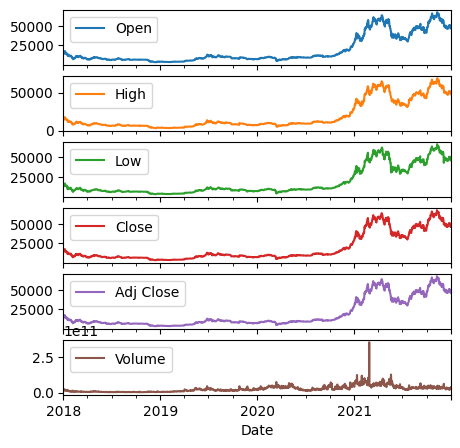

In [478]:
#plotting graph for many column using 'subplot function'
dataset.plot(subplots=True,figsize=(5,5))
plt.show()

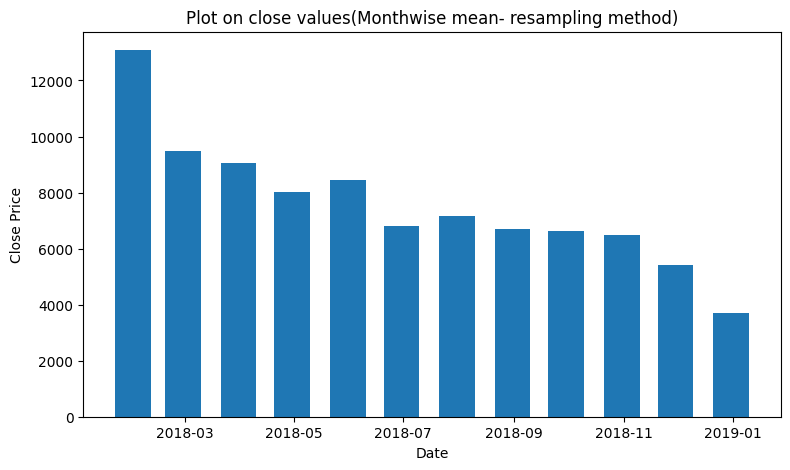

In [479]:
#resampling the time series data based on monthly
dataset_month=dataset.resample("M").mean()
fig,ax=plt.subplots(figsize=(9,5))
ax.bar(dataset_month.loc['2018'].index,dataset_month.loc['2018',"Close"],width=20,align='center')
plt.title('Plot on close values(Monthwise mean- resampling method)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

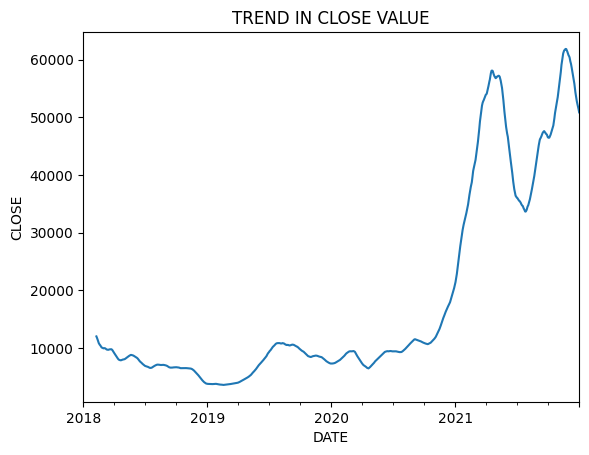

In [480]:
#finding the trend in the dataset for "Close" for given infos
window_size=40
rolling_mean=dataset['Close'].rolling(window_size).mean()    #using rolling mean we're finding the trend 
rolling_mean.plot()
plt.title('TREND IN CLOSE VALUE')
plt.xlabel('DATE')
plt.ylabel('CLOSE')
plt.show()

In [481]:
# Normalize the data using Min-Max scaling
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data)

# Create a new DataFrame with scaled data
scaled_dataset=pd.DataFrame(scaled_data, columns=df, index=dataset.index)

# Print the preprocessed dataset
print(scaled_dataset.head())

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2018-01-01  0.169108  0.165412  0.157672  0.161984   0.161984  0.021166
2018-01-02  0.161533  0.185749  0.157813  0.182579   0.182579  0.040000
2018-01-03  0.182573  0.187706  0.184413  0.185982   0.185982  0.040072
2018-01-04  0.187121  0.190254  0.179313  0.192172   0.192172  0.054182
2018-01-05  0.190332  0.220255  0.190083  0.220624   0.220624  0.060094


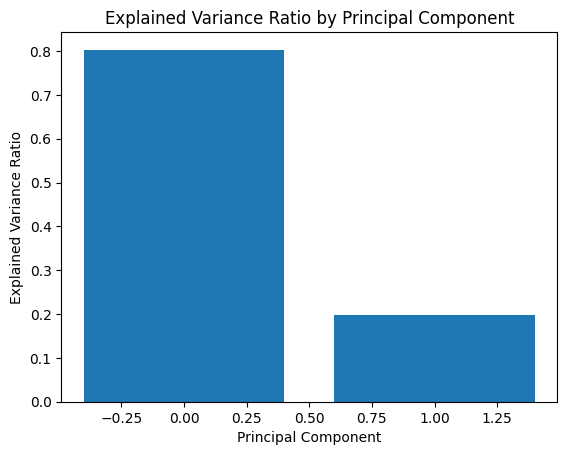

In [482]:
###PRINCIPAL COMPONENT ANALYSIS

data=dataset[['Open','Volume']]

# Normalize the data (excluding the Date column)
scalar=StandardScaler()
data_scaled=scalar.fit_transform(data)

# PCA
pca=PCA(n_components=2)
data_pca=pca.fit_transform(data_scaled)

# Calculate the principal components and their corresponding explained variances
principal_components=pca.components_
explained_variances=pca.explained_variance_ratio_
plt.bar(range(len(explained_variances)), explained_variances)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

In [483]:
# Print the explained variances
print("\n\nExplained variances by principal component:")
for i, explained_variance in enumerate(explained_variances):
    print(f"Principal Component {i+1}: {explained_variance}")



Explained variances by principal component:
Principal Component 1: 0.8029526837348755
Principal Component 2: 0.19704731626512462


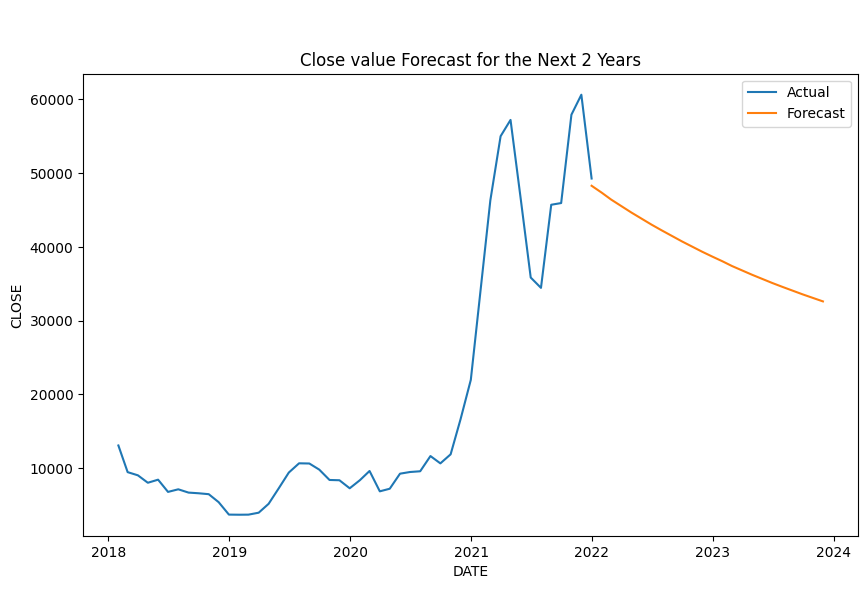

In [484]:
##TIME SERIES FORECASTING

#forecasting the Volume for the next 2 years
model=ARIMA(dataset_month['Close'], order=(1, 0, 0))
model_fit=model.fit()
forecast=model_fit.forecast(steps=24)     #24 means 24 months, i.e: 2 years

last_date=dataset_month.index[-1]
forecast_dates=pd.date_range(start=last_date, periods=24, freq='M')

#forecasting plot model for 2 years (VOLUME)
plt.figure(figsize=(10,6))
plt.plot(dataset_month.index, dataset_month['Close'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.title("\n\nClose value Forecast for the Next 2 Years")
plt.xlabel('DATE')
plt.ylabel('CLOSE')
plt.legend()
plt.show()

In [485]:
# Print the forecast values
print("Close value forecast for the next 2 years:")
for date,value in zip(forecast_dates, forecast):
    print(f"{date}:{value}")

Close value forecast for the next 2 years:
2021-12-31 00:00:00:48282.23276981519
2022-01-31 00:00:00:47332.41466293679
2022-02-28 00:00:00:46412.76518703958
2022-03-31 00:00:00:45522.32610992237
2022-04-30 00:00:00:44660.16963526793
2022-05-31 00:00:00:43825.39743592213
2022-06-30 00:00:00:43017.13971787866
2022-07-31 00:00:00:42234.55431399382
2022-08-31 00:00:00:41476.82580648745
2022-09-30 00:00:00:40743.16467731526
2022-10-31 00:00:00:40032.80648552756
2022-11-30 00:00:00:39345.01107075717
2022-12-31 00:00:00:38679.061782006596
2023-01-31 00:00:00:38034.26473093081
2023-02-28 00:00:00:37409.94806883769
2023-03-31 00:00:00:36805.46128665286
2023-04-30 00:00:00:36220.174537119194
2023-05-31 00:00:00:35653.47797852524
2023-06-30 00:00:00:35104.781139278304
2023-07-31 00:00:00:34573.51230266042
2023-08-31 00:00:00:34059.11791112592
2023-09-30 00:00:00:33561.06198952016
2023-10-31 00:00:00:33078.82558661814
2023-11-30 00:00:00:32611.906234401406


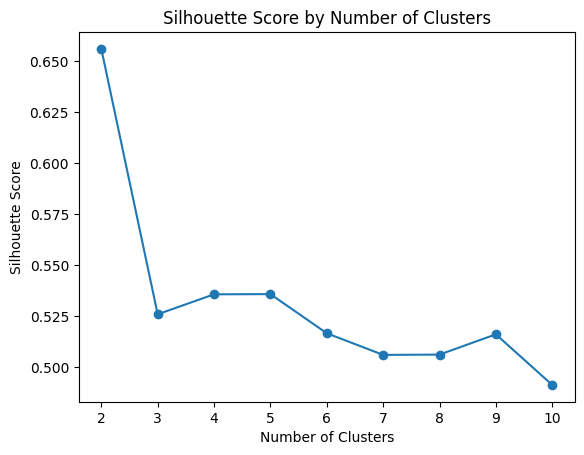

In [486]:
###CLUSTERING
# Determine the optimal number of clusters using silhouette score
silhouette_scores=[]
k_values=range(2,11)
n_init=10                   

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=0,n_init=n_init)
    labels=kmeans.fit_predict(data_pca)
    silhouette_scores.append(silhouette_score(data_pca,labels))

# Plot the silhouette scores
plt.plot(k_values,silhouette_scores,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Number of Clusters')
plt.show()

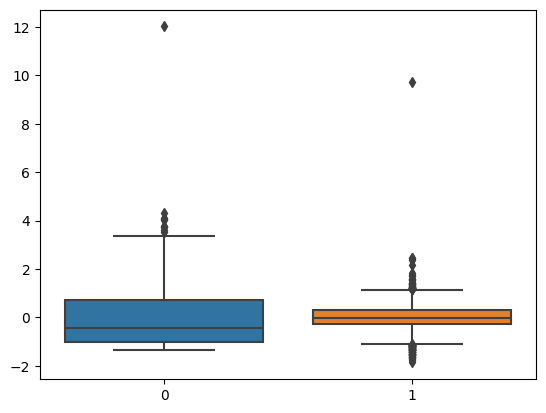

In [487]:
#Outlier Analysis
sns.boxplot(data_pca)
plt.show()

In [488]:
data_df = pd.DataFrame(data_pca)
data_df.columns = ['Open' , 'High']
data_df['Open'] = data_df['Open'].interpolate()
data_df['High'] = data_df['High'].interpolate()

n_init=10   
optimal_k=silhouette_scores.index(max(silhouette_scores))+2
kmeans=KMeans(n_clusters=optimal_k, random_state=0)
labels=kmeans.fit_predict(data_pca)

# Add the cluster labels to the dataset
dataset['Cluster']=labels
data_df['Cluster'] = labels

# Display the cluster labels in a table
cluster_table=pd.DataFrame({'Date':dataset.index,'Cluster': labels})
cluster_inf = data_df.groupby(data_df['Cluster']).mean().reset_index()
print(cluster_inf)

   Cluster      Open      High
0        0 -0.634006  0.128346
1        1  1.896820 -0.383987


C:\Users\karni\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


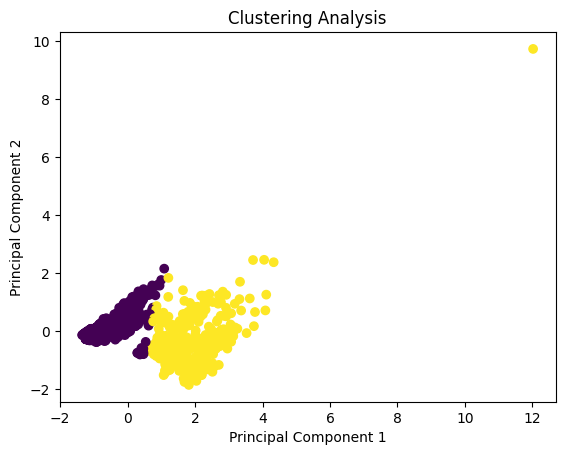

In [489]:
# Plot the clusters
plt.scatter(data_pca[:,0], data_pca[:,1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Analysis')
plt.show()

In [490]:
# Count the number of occurrences for each cluster
cluster_counts=cluster_table['Cluster'].value_counts().reset_index()
cluster_counts.columns=['Cluster','Count']
cluster_counts=cluster_counts.sort_values('Cluster')

# Print the cluster counts table
print("\n\nCluster Counts:")
print(cluster_counts)



Cluster Counts:
   Cluster  Count
0        0   1095
1        1    366


Random Forest Mean Squared Error: 11018.756042512086


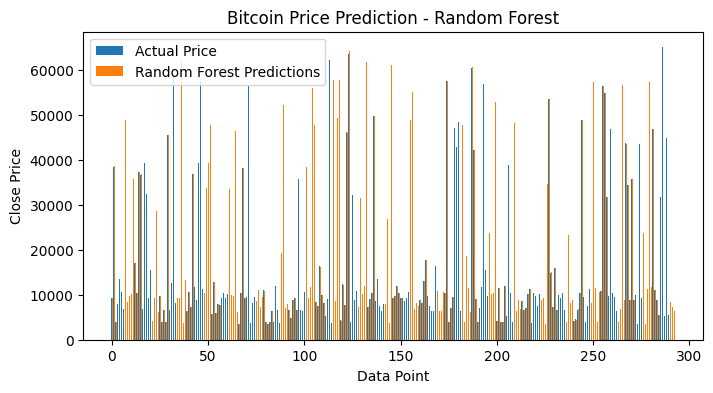

In [491]:
# Feature Selection
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
X = dataset[features]
y = dataset['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)

# Random Forest Bar Plot
bar_width = 0.35
num_data_points = len(y_test)
x = np.arange(num_data_points)
plt.figure(figsize=(8, 4))
plt.bar(x, y_test.values, width=bar_width, label="Actual Price")
plt.bar(x + bar_width, rf_predictions, width=bar_width, label="Random Forest Predictions")
plt.xlabel('Data Point')
plt.ylabel('Close Price')
plt.title('Bitcoin Price Prediction - Random Forest')
plt.legend()
plt.show()


Gradient Boosting Mean Squared Error: 12601.313409841134


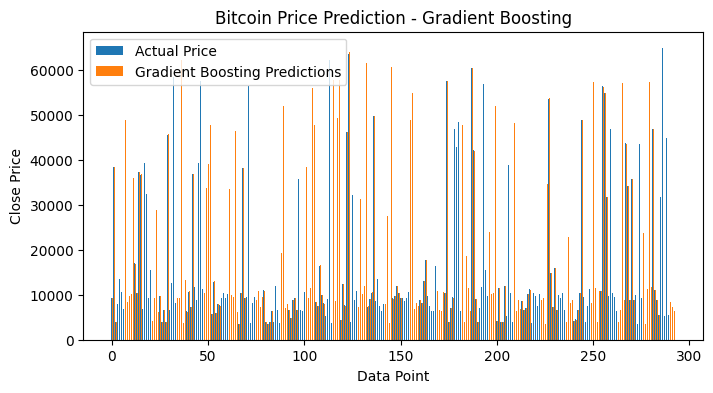

In [492]:
# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_train)
gb_predictions = gb_regressor.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print("Gradient Boosting Mean Squared Error:", gb_mse)

# Gradient Boosting Bar Plot
plt.figure(figsize=(8, 4))
plt.bar(x, y_test.values, width=bar_width, label="Actual Price")
plt.bar(x + bar_width, gb_predictions, width=bar_width, label="Gradient Boosting Predictions")
plt.xlabel('Data Point')
plt.ylabel('Close Price')
plt.title('Bitcoin Price Prediction - Gradient Boosting')
plt.legend()
plt.show()

Neural Network Mean Squared Error: 209263658.74154776


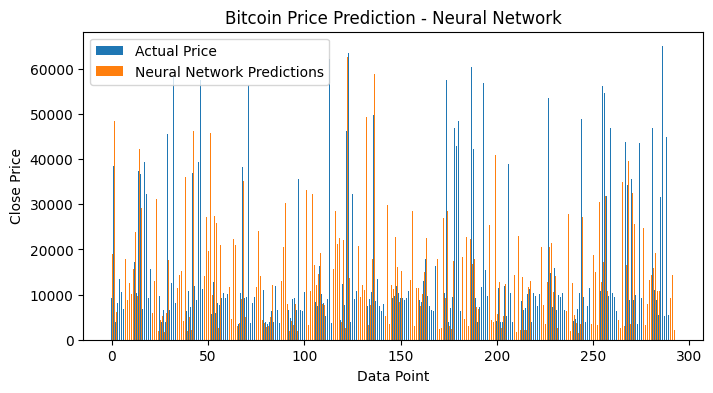

In [493]:
# Neural Network Regressor
nn_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
nn_regressor.fit(X_train, y_train)
nn_predictions = nn_regressor.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_predictions)
print("Neural Network Mean Squared Error:", nn_mse)

# Neural Network Bar Plot
plt.figure(figsize=(8, 4))
plt.bar(x, y_test.values, width=bar_width, label="Actual Price")
plt.bar(x + bar_width, nn_predictions, width=bar_width, label="Neural Network Predictions")
plt.xlabel('Data Point')
plt.ylabel('Close Price')
plt.title('Bitcoin Price Prediction - Neural Network')
plt.legend()
plt.show()

In [494]:
# Find the date with the highest closing price
highest_close_date = y_test.idxmax()
highest_close_price = y_test.max()

print("Highest Closing Price:", highest_close_price)
print("Date of Highest Closing Price:", highest_close_date)

Highest Closing Price: 64949.96094
Date of Highest Closing Price: 2021-11-11 00:00:00
